In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from wordcloud import WordCloud

In [2]:
train=pd.read_csv('train_v2_drcat_02.csv')
train_1=pd.read_csv('train_essays.csv')

In [3]:
train.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [4]:
train_1.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


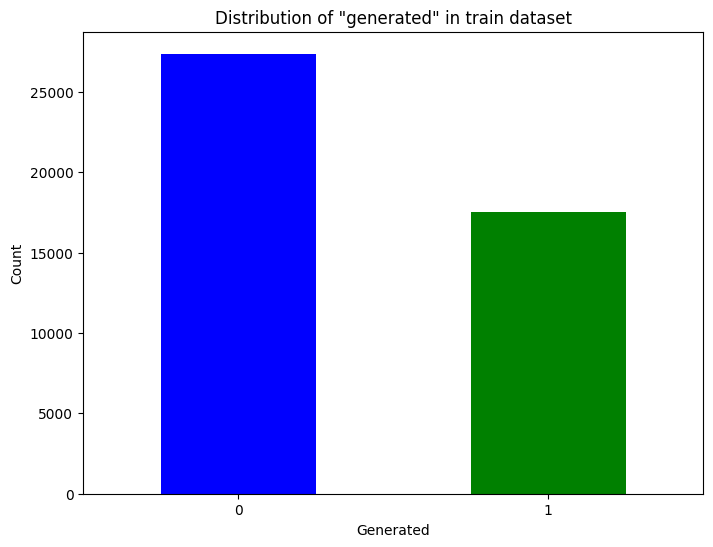

In [5]:
# Plot for train dataset
plt.figure(figsize=(8, 6))
train['label'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "generated" in train dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

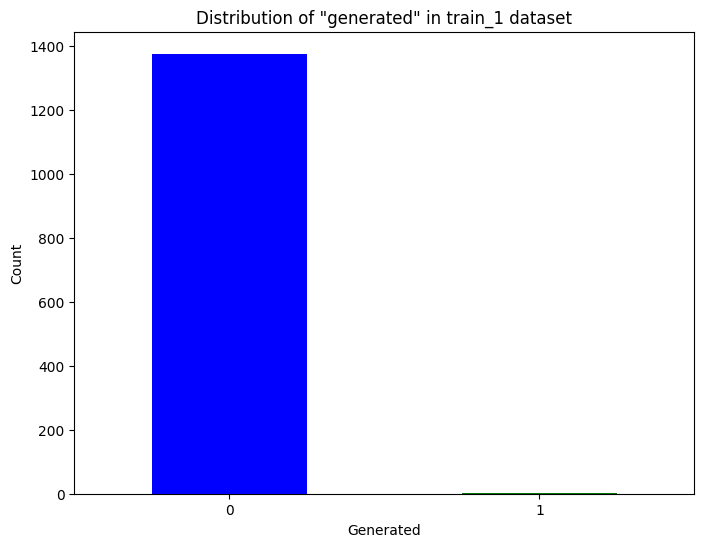

In [6]:
# Plot for train_1 dataset
plt.figure(figsize=(8, 6))
train_1['generated'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "generated" in train_1 dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [7]:
import pandas as pd

# Selecting necessary columns from train dataset
train_selected = train[['text', 'label']].copy()

# Selecting necessary columns from train_1 dataset and renaming 'generated' to match the 'label' column
train_1_selected = train_1[['text', 'generated']].rename(columns={'generated': 'label'}).copy()

# Concatenating the selected columns from both datasets
combined_data = pd.concat([train_selected, train_1_selected], ignore_index=True)

In [8]:
combined_data

,text,label
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0
...,...,...
46241,There has been a fuss about the Elector Colleg...,0
46242,Limiting car usage has many advantages. Such a...,0
46243,There's a new trend that has been developing f...,0
46244,As we all know cars are a big part of our soci...,0


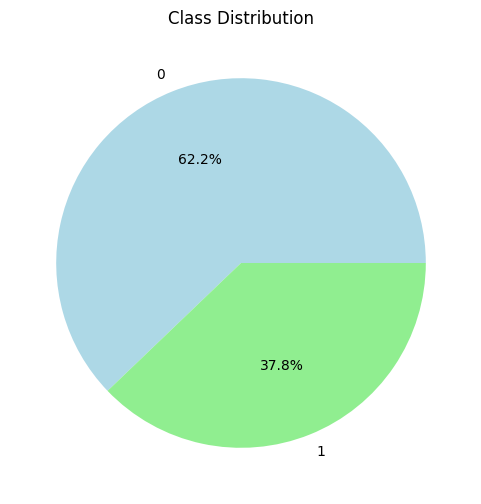

In [9]:
import matplotlib.pyplot as plt

# Calculate class distribution
class_distribution = combined_data['label'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Class Distribution')
plt.show()


In [10]:
# Checking for duplicates in combined_data
duplicate_rows = combined_data[combined_data.duplicated()]
print("Duplicate Rows:")
duplicate_rows.sort_values(by="label")
print(duplicate_rows)


# Checking for null values in combined_data
null_values = combined_data.isnull().sum()
print("\nNull Values:")
print(null_values)

# Dropping duplicates and null values from combined_data
combined_data.drop_duplicates(inplace=True)
combined_data.dropna(inplace=True)

# Confirming the removal of duplicates and null values
print("\nAfter Dropping:")
print(combined_data.shape)  # Check the shape after dropping


Duplicate Rows:
                                                    text  label
44868  Cars. Cars have been around since they became ...      0
44869  Transportation is a large necessity in most co...      0
44870  "America's love affair with it's vehicles seem...      0
44871  How often do you ride in a car? Do you drive a...      0
44872  Cars are a wonderful thing. They are perhaps o...      0
...                                                  ...    ...
46241  There has been a fuss about the Elector Colleg...      0
46242  Limiting car usage has many advantages. Such a...      0
46243  There's a new trend that has been developing f...      0
46244  As we all know cars are a big part of our soci...      0
46245  Cars have been around since the 1800's and hav...      0

[1378 rows x 2 columns]

Null Values:
text     0
label    0
dtype: int64

After Dropping:
(44868, 2)


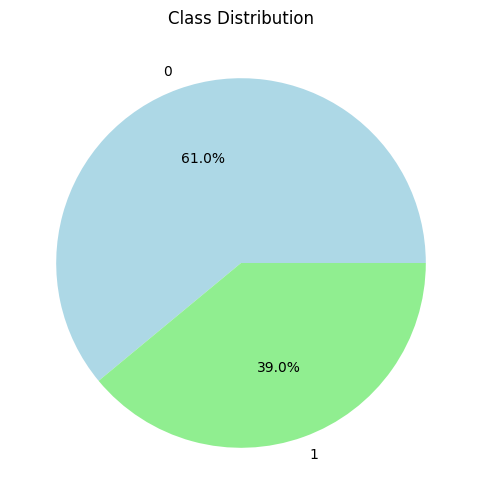

In [11]:
import matplotlib.pyplot as plt

# Calculate class distribution
class_distribution = combined_data['label'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Class Distribution')
plt.show()

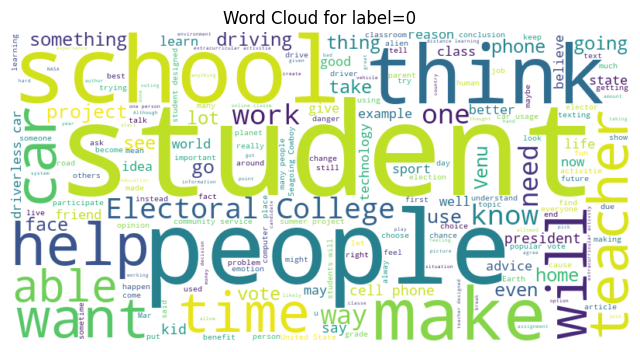

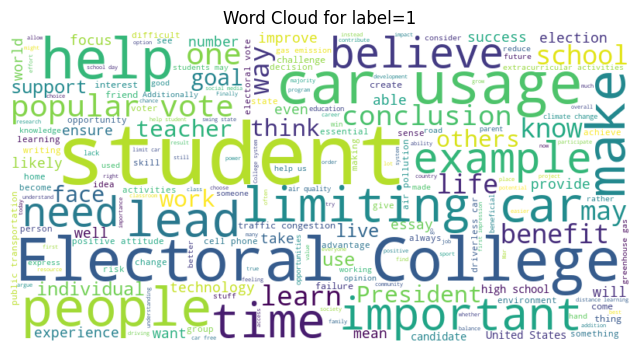

In [12]:
# Filter the combined data based on label values
label_0_text = ' '.join(combined_data[combined_data['label'] == 0]['text'])
label_1_text = ' '.join(combined_data[combined_data['label'] == 1]['text'])

# Generate word clouds
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(label_0_text)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(label_1_text)


# Plotting word cloud for label=0
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title('Word Cloud for label=0')
plt.axis('off')
plt.show()

# Plotting word cloud for label=1
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for label=1')
plt.axis('off')
plt.show()

# Vectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Tokenize and create TF-IDF vectors for the 'text' column of the combined dataset
tfidf_vectors = tfidf_vectorizer.fit_transform(combined_data['text'])

# Convert TF-IDF vectors to a DataFrame for easy analysis
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

    00       000   10  100   11  114  118   12   13   14  ...      your  \
0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.193019   
2  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3  0.0  0.060816  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

   yours  yourself  youth  youtube  zip  zone  zones  zoos  zygomatic  
0    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
1    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
2    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
3    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
4    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  

[5 rows x 5000 columns]


In [14]:
# Split the data into training and testing sets
X = tfidf_df.values  # Features (TF-IDF vectors)
y = combined_data['label'].values  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:

# Encode target labels (0 and 1) using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Neuarl Network

In [16]:
# Build a simple neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded), verbose=1)


Epoch 1/10
1122/1122 [==============================] - 5s 4ms/step - loss: 0.0504 - accuracy: 0.9806 - val_loss: 0.0158 - val_accuracy: 0.9953
Epoch 2/10
1122/1122 [==============================] - 3s 3ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0184 - val_accuracy: 0.9953
Epoch 3/10
1122/1122 [==============================] - 5s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0229 - val_accuracy: 0.9952
Epoch 4/10
1122/1122 [==============================] - 5s 4ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0264 - val_accuracy: 0.9943
Epoch 5/10
1122/1122 [==============================] - 5s 4ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.0292 - val_accuracy: 0.9950
Epoch 6/10
1122/1122 [==============================] - 5s 5ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0328 - val_accuracy: 0.9938
Epoch 7/10
1122/1122 [==============================] - 5s 4ms/step - loss: 6.4820e-04 - accuracy: 0.9998 - val_loss: 0.0304 - val_accur

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {test_accuracy:.4f}')

281/281 [==============================] - 0s 749us/step - loss: 0.0327 - accuracy: 0.9950
Test Accuracy: 0.9950


In [19]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


281/281 [==============================] - 0s 710us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5481
           1       1.00      0.99      0.99      3493

    accuracy                           0.99      8974
   macro avg       1.00      0.99      0.99      8974
weighted avg       1.00      0.99      0.99      8974

ROC-AUC Score: 0.9996


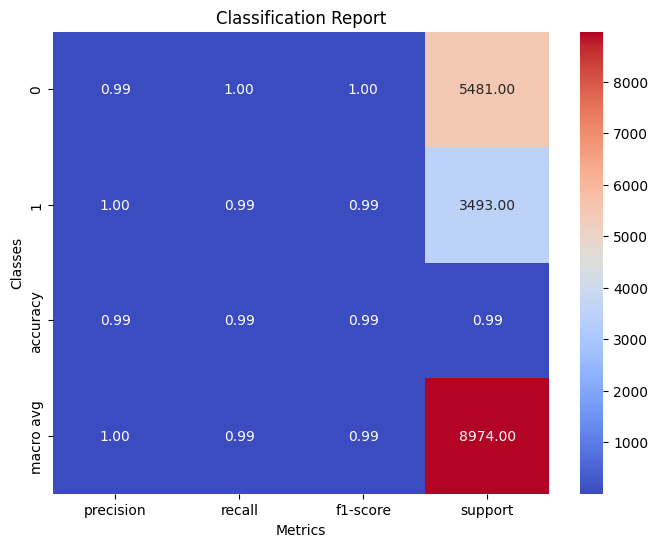

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Calculate classification report
report = classification_report(y_test_encoded, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

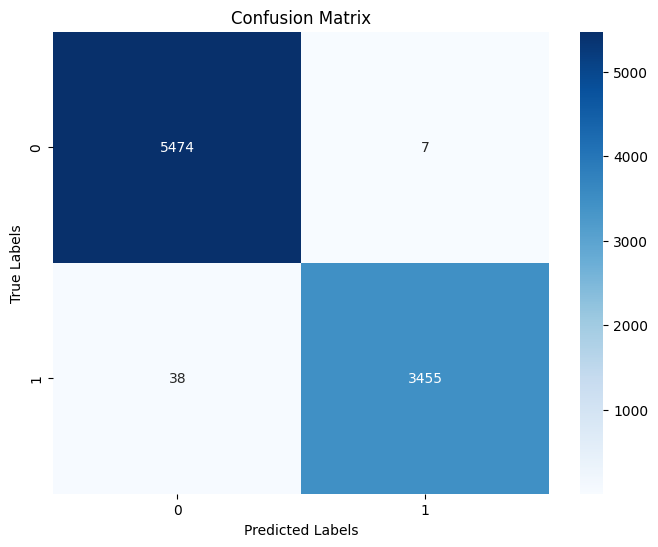

In [21]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Saving Tokenizer and Model

In [22]:
import pickle

# Save the TF-IDF tokenizer
# with open('tfidf_tokenizer.pkl', 'wb') as f:
#     pickle.dump(tfidf_vectorizer, f)

# Save the trained model
# model.save('text_classification_model.h5')


# Usage Code

In [23]:
import pickle
from tensorflow.keras.models import load_model

# Load the TF-IDF tokenizer
with open('tfidf_tokenizer.pkl', 'rb') as f:
    tfidf_tokenizer = pickle.load(f)

# Load the trained model
loaded_model = load_model('text_classification_model.h5')

# Function to preprocess text and make predictions
def predict_outcome(text):
    # Preprocess the text using the loaded tokenizer
    text_features = tfidf_tokenizer.transform([text])
    
    # Make predictions using the loaded model
    predictions = loaded_model.predict(text_features)
    
    # Return the predicted outcome (1 for positive, 0 for negative)
    return int(predictions[0][0])

# Example usage
input_text = """
I am writing this from my intern desk at Walmart. The view from here is of serene blue Bangalore skies, under which many people are working, some of whom are exceptional in their work, sitting at their computers and doing their bit. Some are pushing themselves to do better each day, and others are far away from this place, carrying in their hearts the hope, excitement, and desire to come here and belong. Well, until last year, I was the latter—a simple student, learning skills, sometimes struggling to find the right approach at the right time, and often wondering when I'd make it. No amount of LinkedIn posts would suffice to describe the roller coaster ride I had, but I'll try my best. It was consistency, hard work, people, and hopes.

I hope your dreams come to you the same way mine did: slowly, steadily, and then all at once.

With this, I'm happy to share that I'm diving into the corporate world and starting my position as a summer intern at Walmart. I'd like to extend my heartfelt thanks to Aishwarya Dhakate and Arpit Jain for the smooth onboarding process. And special thanks to Payal Aggarwal and Sneha Maurya for their unwavering support and guidance. Looking forward to a summer full of growth and learning! 
"""


predicted_label = predict_outcome(input_text)
print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 51ms/step
Predicted Label: 0
